In [199]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import contractions

[nltk_data] Downloading package punkt to /Users/wanqian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [200]:
df = pd.read_excel(r'/Users/wanqian/pytorch-test/IR/labelled_data.xlsx')
df

,title,reviewDescription,Sentiment
0,Good price,Returned,1
1,Device working as advertised,Like the size,1
2,"Looks Good, Battery Sucks",Phone arrived and appeared to be in pristine c...,0
3,Like new,Excellent condition,1
4,Battery disappointment,It has taken me some time getting use to this ...,0
...,...,...,...
1217,"If purchased from CPRTX, return inmediately an...","I don't usually write bad reviews, specially o...",-1
1218,.,Was not pleased with the packaging of the phone.,-1
1219,Great phone,Great phone renewed like new. Wish it was a sm...,1
1220,Wrong charger & charging cable sent,Was traveling when my phone died. Secured thi...,-1


In [201]:
# Calculate number of -1s
count_minus_ones = df['Sentiment'].value_counts().get(-1, 3)
print("Number of '-1' sentiments:", count_minus_ones)

#Calculate number of 1s
count_positive_ones = df['Sentiment'].value_counts().get(1, 3)
print("Number of '1' sentiments:", count_positive_ones)


#Calculate number of 0s
count_neutral = df['Sentiment'].value_counts().get(0, 3)
print("Number of '0' sentiments:", count_neutral)

Number of '-1' sentiments: 581
Number of '1' sentiments: 508
Number of '0' sentiments: 133


<Axes: >

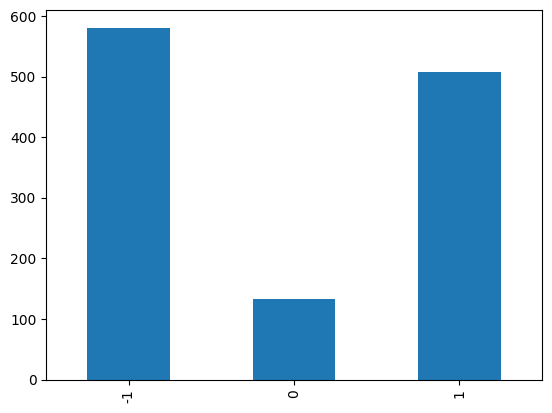

In [202]:
df['Sentiment'] = df['Sentiment'].astype('category')
df['Sentiment'].value_counts().sort_index().plot.bar()


In [203]:
# Remove non-ASCII characters from 'title' and 'reviewDescription'
pattern = re.compile("[^\x00-\x7F]+")
df['title'] = df['title'].apply(lambda x: pattern.sub('', str(x)))
df['reviewDescription'] = df['reviewDescription'].apply(lambda x: pattern.sub('', str(x)))

In [204]:
df['text'] = df.apply(lambda row: row['title'] + ' ' + row['reviewDescription'], axis=1)
df.drop(['title', 'reviewDescription'], axis=1, inplace=True)

In [205]:
df


,Sentiment,text
0,1,Good price Returned
1,1,Device working as advertised Like the size
2,0,"Looks Good, Battery Sucks Phone arrived and ap..."
3,1,Like new Excellent condition
4,0,Battery disappointment It has taken me some ti...
...,...,...
1217,-1,"If purchased from CPRTX, return inmediately an..."
1218,-1,. Was not pleased with the packaging of the ph...
1219,1,Great phone Great phone renewed like new. Wish...
1220,-1,Wrong charger & charging cable sent Was travel...


In [206]:
#lowercase
df['text_cleaned'] = df['text'].str.lower()

In [207]:
# #convert lists back to strings
# df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join(x))

#expand contractions: wouldnt-> would not 
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join([contractions.fix(word) for word in x.split()]))


In [208]:
#remove emoticons e.g. loc 40 
df['text_cleaned'] = df['text_cleaned'].replace(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:|=^.^=|0_o,'
                                                      r'' , regex=True)
    
#remove punctuations 
df['text_cleaned'] = df['text_cleaned'].str.replace(r'[^\w\s]+', '')

/var/folders/qd/h4t1gv7s69z7q8m9zzg1t0lh0000gn/T/ipykernel_46619/65612847.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_cleaned'] = df['text_cleaned'].str.replace(r'[^\w\s]+', '')


In [209]:
df

,Sentiment,text,text_cleaned
0,1,Good price Returned,good price returned
1,1,Device working as advertised Like the size,device working as advertised like the size
2,0,"Looks Good, Battery Sucks Phone arrived and ap...",looks good battery sucks phone arrived and app...
3,1,Like new Excellent condition,like new excellent condition
4,0,Battery disappointment It has taken me some ti...,battery disappointment it has taken me some ti...
...,...,...,...
1217,-1,"If purchased from CPRTX, return inmediately an...",if purchased from cprtx return inmediately and...
1218,-1,. Was not pleased with the packaging of the ph...,was not pleased with the packaging of the phone
1219,1,Great phone Great phone renewed like new. Wish...,great phone great phone renewed like new wish ...
1220,-1,Wrong charger & charging cable sent Was travel...,wrong charger charging cable sent was traveli...


In [210]:
def check_empty_column(df): 
    for col in df.columns:
        print(col, df[col].isnull().sum())

check_empty_column(df)

Sentiment 0
text 0
text_cleaned 0


In [211]:
# Load the Excel sheet containing slangs and their corresponding text
slangs_df = pd.read_csv(r'/Users/wanqian/pytorch-test/Data/Slangs.csv')

# Create a dictionary with slangs as keys and their corresponding text as values
slangs_dict = {}
for index, row in slangs_df.iterrows():
    slangs_dict[row['Slang']] = row['Text']

# Define a function to replace slangs in a tweet with their corresponding text
def preprocess_text(text):
    words = text.split()
    new_words = []
    for word in words:
        if word in slangs_dict:
            new_words.append(slangs_dict[word])
        else:
            new_words.append(word)
    return " ".join(new_words)

# Preprocess the tweets using the defined function
df['text_cleaned'] = df['text_cleaned'].apply(preprocess_text)

# Print the preprocessed tweets dataframe
df

,Sentiment,text,text_cleaned
0,1,Good price Returned,good price returned
1,1,Device working as advertised Like the size,device working as advertised like the size
2,0,"Looks Good, Battery Sucks Phone arrived and ap...",looks good battery sucks phone arrived and app...
3,1,Like new Excellent condition,like new excellent condition
4,0,Battery disappointment It has taken me some ti...,battery disappointment it has taken me some ti...
...,...,...,...
1217,-1,"If purchased from CPRTX, return inmediately an...",if purchased from cprtx return inmediately and...
1218,-1,. Was not pleased with the packaging of the ph...,was not pleased with the packaging of the phone
1219,1,Great phone Great phone renewed like new. Wish...,great phone great phone renewed like new wish ...
1220,-1,Wrong charger & charging cable sent Was travel...,wrong charger charging cable sent was travelin...


In [212]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    """Function to remove stopwords from text"""
    filtered_text = []
    for word in text.split():
        if word.lower() not in stop_words:
            filtered_text.append(word.lower())
    return " ".join(filtered_text)

df['text_cleaned'] = df['text_cleaned'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wanqian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [213]:
df

,Sentiment,text,text_cleaned
0,1,Good price Returned,good price returned
1,1,Device working as advertised Like the size,device working advertised like size
2,0,"Looks Good, Battery Sucks Phone arrived and ap...",looks good battery sucks phone arrived appeare...
3,1,Like new Excellent condition,like new excellent condition
4,0,Battery disappointment It has taken me some ti...,battery disappointment taken time getting use ...
...,...,...,...
1217,-1,"If purchased from CPRTX, return inmediately an...",purchased cprtx return inmediately pray get st...
1218,-1,. Was not pleased with the packaging of the ph...,pleased packaging phone
1219,1,Great phone Great phone renewed like new. Wish...,great phone great phone renewed like new wish ...
1220,-1,Wrong charger & charging cable sent Was travel...,wrong charger charging cable sent traveling ph...


In [214]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    """
    Map POS tag to first character used by WordNetLemmatizer
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # return NOUN as default

In [215]:
df

,Sentiment,text,text_cleaned
0,1,Good price Returned,good price returned
1,1,Device working as advertised Like the size,device working advertised like size
2,0,"Looks Good, Battery Sucks Phone arrived and ap...",looks good battery sucks phone arrived appeare...
3,1,Like new Excellent condition,like new excellent condition
4,0,Battery disappointment It has taken me some ti...,battery disappointment taken time getting use ...
...,...,...,...
1217,-1,"If purchased from CPRTX, return inmediately an...",purchased cprtx return inmediately pray get st...
1218,-1,. Was not pleased with the packaging of the ph...,pleased packaging phone
1219,1,Great phone Great phone renewed like new. Wish...,great phone great phone renewed like new wish ...
1220,-1,Wrong charger & charging cable sent Was travel...,wrong charger charging cable sent traveling ph...


In [216]:
#tokenize column to prepare lemmatization
df['text_tokenize'] = df['text_cleaned'].apply(word_tokenize)
    
    
#Lemmatize Tweet  
df['text_lemmatized'] = df['text_tokenize'].apply(nltk.tag.pos_tag)


df['text_lemmatized'] = df['text_lemmatized'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])


#apply NLTK lemmatization
wnl = WordNetLemmatizer()
df['text_lemmatized'] = df['text_lemmatized'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

#convert back to strings
df['text_lemmatized']  = [' '.join(map(str, l)) for l in df['text_lemmatized']]

In [217]:
df

,Sentiment,text,text_cleaned,text_tokenize,text_lemmatized
0,1,Good price Returned,good price returned,"[good, price, returned]",good price return
1,1,Device working as advertised Like the size,device working advertised like size,"[device, working, advertised, like, size]",device work advertise like size
2,0,"Looks Good, Battery Sucks Phone arrived and ap...",looks good battery sucks phone arrived appeare...,"[looks, good, battery, sucks, phone, arrived, ...",looks good battery suck phone arrive appeared ...
3,1,Like new Excellent condition,like new excellent condition,"[like, new, excellent, condition]",like new excellent condition
4,0,Battery disappointment It has taken me some ti...,battery disappointment taken time getting use ...,"[battery, disappointment, taken, time, getting...",battery disappointment take time get use phone...
...,...,...,...,...,...
1217,-1,"If purchased from CPRTX, return inmediately an...",purchased cprtx return inmediately pray get st...,"[purchased, cprtx, return, inmediately, pray, ...",purchase cprtx return inmediately pray get ste...
1218,-1,. Was not pleased with the packaging of the ph...,pleased packaging phone,"[pleased, packaging, phone]",pleased packaging phone
1219,1,Great phone Great phone renewed like new. Wish...,great phone great phone renewed like new wish ...,"[great, phone, great, phone, renewed, like, ne...",great phone great phone renew like new wish sm...
1220,-1,Wrong charger & charging cable sent Was travel...,wrong charger charging cable sent traveling ph...,"[wrong, charger, charging, cable, sent, travel...",wrong charger charge cable send travel phone d...


In [218]:
df['text'] = df['text_lemmatized']

In [219]:
df = df.drop(columns=['text_cleaned', 'text_tokenize', 'text_lemmatized'])

In [220]:
df

,Sentiment,text
0,1,good price return
1,1,device work advertise like size
2,0,looks good battery suck phone arrive appeared ...
3,1,like new excellent condition
4,0,battery disappointment take time get use phone...
...,...,...
1217,-1,purchase cprtx return inmediately pray get ste...
1218,-1,pleased packaging phone
1219,1,great phone great phone renew like new wish sm...
1220,-1,wrong charger charge cable send travel phone d...


In [221]:
num_unique_words = len(df['text'].str.split(expand=True).stack().unique())
print ('Number of unique words = ', num_unique_words)

Number of unique words =  3697


In [222]:
words = df['text'].str.split()


In [223]:
check_empty_column(df)

Sentiment 0
text 0


In [224]:
df.to_csv('~/pytorch-test/IR/preprocessed.csv')